In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not.

Bonus: Determine what are the key features that influence your model.

PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.

In [49]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, f1_score


from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn import tree

In [65]:
df = pd.read_csv('datasets/data.csv')

In [34]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.37059,0.42439,0.40575,0.60146,0.60146,0.99897,0.79689,0.80881,0.30265,0.78098,0.00013,0.00000,0.45814,0.00073,0.00000,0.14795,0.14795,0.14795,0.16914,0.31166,0.01756,0.09592,0.13874,0.02210,0.84819,0.68898,0.68898,0.21754,4980000000.00000,0.00033,0.26310,0.36373,0.00226,0.00121,0.62995,0.02127,0.20758,0.79242,0.00502,...,0.19064,0.00409,0.00200,0.00015,0.14731,0.33402,0.27692,0.00104,0.67627,0.72127,0.33908,0.02559,0.90322,0.00202,0.06486,701000000.00000,6550000000.00000,0.59383,458000000.00000,0.67157,0.42421,0.67627,0.33908,0.12655,0.63756,0.45861,0.52038,0.31290,0.11825,0,0.71685,0.00922,0.62288,0.60145,0.82789,0.29020,0.02660,0.56405,1,0.01647
1,1,0.46429,0.53821,0.51673,0.61024,0.61024,0.99895,0.79738,0.80930,0.30356,0.78151,0.00029,0.00000,0.46187,0.00065,0.00000,0.18225,0.18225,0.18225,0.20894,0.31814,0.02114,0.09372,0.16992,0.02208,0.84809,0.68969,0.68970,0.21762,6110000000.00000,0.00044,0.26452,0.37671,0.00602,0.00404,0.63517,0.01250,0.17118,0.82882,0.00506,...,0.18242,0.01495,0.00414,0.00138,0.05696,0.34111,0.28964,0.00521,0.30859,0.73198,0.32974,0.02395,0.93107,0.00223,0.02552,0.00011,7700000000.00000,0.59392,2490000000.00000,0.67157,0.46883,0.30859,0.32974,0.12092,0.64110,0.45900,0.56710,0.31416,0.04778,0,0.79530,0.00832,0.62365,0.61024,0.83997,0.28385,0.26458,0.57017,1,0.02079
2,1,0.42607,0.49902,0.47230,0.60145,0.60136,0.99886,0.79640,0.80839,0.30204,0.78028,0.00024,25500000.00000,0.45852,0.00079,0.00000,0.17791,0.17791,0.19371,0.18058,0.30710,0.00594,0.09234,0.14280,0.02276,0.84809,0.68946,0.68947,0.21760,7280000000.00000,0.00040,0.26418,0.36891,0.01154,0.00535,0.62963,0.02125,0.20752,0.79248,0.00510,...,0.60281,0.00099,0.00630,5340000000.00000,0.09816,0.33673,0.27746,0.01388,0.44603,0.74273,0.33478,0.00372,0.90990,0.00206,0.02139,0.00179,0.00102,0.

In [35]:
df.info(show_counts=True)
pd.options.display.float_format = '{:.5f}'.format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [36]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 96)


In [27]:
# No need to encode since all data are numerical

In [66]:
y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)
depth = 3

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Train the Ridge classifier
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(x_train, y_train)

# Accuracy score
y_pred = model.predict(x_test)

# Measure the accuracy for validation data
accuracy = (y_test == y_pred).mean()
print('Accuracy of Model = {:.3f}'.format(accuracy))


Accuracy of Model = 0.085


c:\Users\lijaa\Desktop\MY-DAC-Curriculum\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


DecisionTreeClassifier: accuracy = 0.964


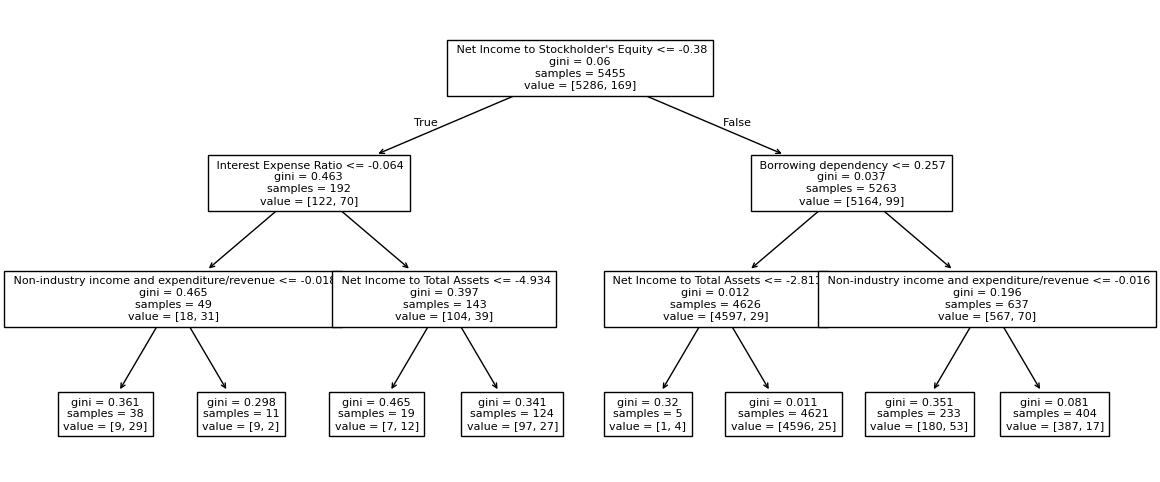

Accuracy of Model = 0.085


c:\Users\lijaa\Desktop\MY-DAC-Curriculum\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [67]:
# Decision Tree Model
sk_model = DecisionTreeClassifier(max_depth=depth, 
                                  random_state=1)
sk_model.fit(x_train, y_train)
sk_pred = sk_model.predict(x_test)
acc = (y_test == sk_pred).mean()
print('DecisionTreeClassifier: accuracy = {:.3f}'.format(acc))

# plotting 
feature_names = x.columns.tolist()
plt.figure(figsize=(14, 6))
tree.plot_tree(sk_model,
               feature_names=feature_names,
               fontsize=8)
plt.show()

# Predict and get accuracy score
y_pred = model.predict(x_test)
accuracy = (y_test == y_pred).mean()
print('Accuracy of Model = {:.3f}'.format(accuracy))

Depth = 1, train_acc = 0.9684, eval_acc = 0.9668
Depth = 2, train_acc = 0.9711, eval_acc = 0.9638
Depth = 3, train_acc = 0.9736, eval_acc = 0.9570
Depth = 4, train_acc = 0.9778, eval_acc = 0.9541
Depth = 5, train_acc = 0.9834, eval_acc = 0.9599
Depth = 6, train_acc = 0.9870, eval_acc = 0.9541
Depth = 7, train_acc = 0.9906, eval_acc = 0.9511
Depth = 8, train_acc = 0.9929, eval_acc = 0.9511


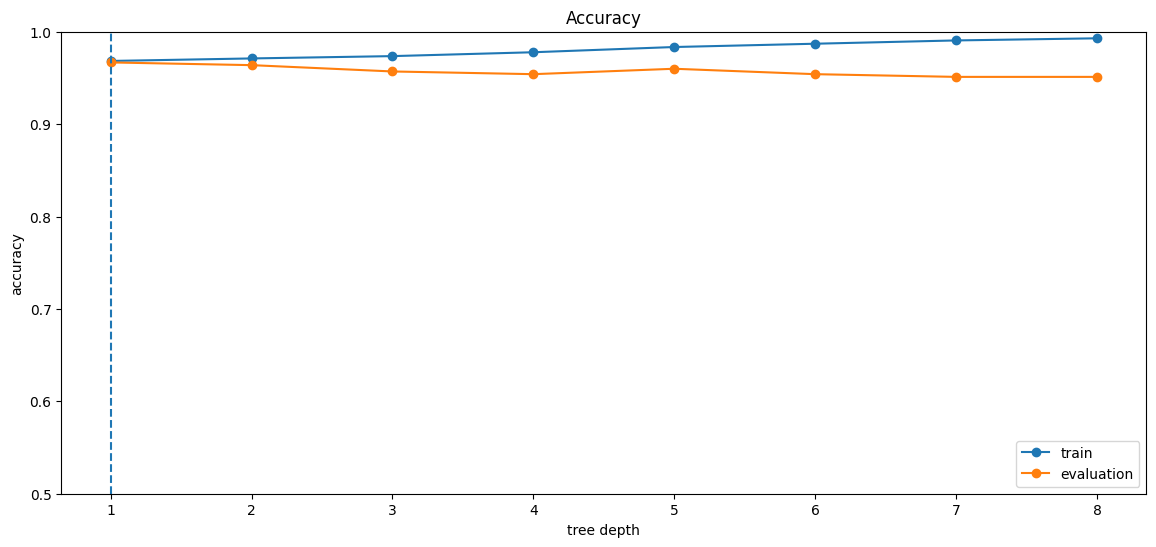

In [68]:
# Separate data into features and target class.
y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)

# Split data into training, validation and test data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

x_test, x_eval, y_test, y_eval = train_test_split(x_test, y_test, test_size = 0.5)


# Create decision tree models of various depths, 
# and measure the accuracy of validation data for each model.
train_acc = []
eval_acc = []
max_depth = 8
for d in range(1, max_depth+1):
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(x_train, y_train)
    
    # Measure accuracy of this model using the training data.
    y_pred = model.predict(x_train)
    train_acc.append((y_pred == y_train).mean())

    # Measure accuracy of this model using the validation data.
    y_pred = model.predict(x_eval)
    eval_acc.append((y_pred == y_eval).mean())
    print('Depth = {}, train_acc = {:.4f}, eval_acc = {:.4f}'\
          .format(d, train_acc[-1], eval_acc[-1]))

# Find the optimal depth with the highest accuracy of validation data.
opt_depth = np.argmax(eval_acc) + 1

# Visualize accuracy changes as depth changes.
plt.plot(train_acc, marker='o', label='train')
plt.plot(eval_acc, marker='o', label='evaluation')
plt.legend()
plt.title('Accuracy')
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(max_depth), np.arange(1, max_depth+1))
plt.axvline(x=opt_depth-1, ls='--')
plt.ylim(0.5, 1.0)
plt.show()

In [ ]:
# Optimal depth is 4
model = DecisionTreeClassifier(max_depth=4)
model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=4)

In [48]:
print(data["Bankrupt?"].value_counts())
# Dataset is imbalanced

Bankrupt?
0    6599
1     220
Name: count, dtype: int64


In [69]:
# Using RandomForest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=21, class_weight='balanced')
rf_model.fit(x_train, y_train)

# Make predictions
y_pred = rf_model.predict(x_test)

# Evaluate 
y_pred = model.predict(x_test)
accuracy = (y_test == y_pred).mean()
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"F1 Score: {f1:.3f}")

Accuracy: 0.960
F1 Score: 0.349


In [ ]:

# Replace 'Bankrupt?' as the target variable
y = np.array(data['Bankrupt?'])
x = np.array(data.drop('Bankrupt?', axis=1))

# Split into training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a Random Forest model on the data
n_estimators = 50
n_depth = 5

model = RandomForestClassifier(n_estimators=300, max_depth=15, oob_score=True, random_state=42)
model.fit(x_train, y_train)

# Evaluate the model on the test set
accuracy = model.score(x_test, y_test)
print(f"Model Accuracy: {accuracy:.3f}")

# Feature Importance Visualization
feature_importances = model.feature_importances_
plt.bar(range(x_train.shape[1]), feature_importances)
plt.title("Feature Importances")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

# Evaluate 
y_pred = model.predict(x_test)
accuracy = (y_test == y_pred).mean()
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"F1 Score: {f1:.3f}")
